In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [63]:
df=pd.read_csv("C:/Users/Dell/Downloads/date formatted data.csv")
df

,sale_id,product_id,customer_id,sale_price,quantity,sale_date,Unnamed: 6,Unnamed: 7
0,1001,P101,C_001,$150.00,2.0,15-01-2023,NaN,NaN
1,1002,P102,C_002,$75,3.0,20-01-2023,NaN,20-01-2023
2,1003,P103,C_001,$250.50,1.0,25-01-2023,NaN,NaN
3,1004,P101,C_003,$150.00,4.0,01-02-2023,NaN,NaN
4,1005,P104,C_004,$30.00,NaN,05-02-2023,NaN,NaN
...,...,...,...,...,...,...,...,...
995,1996,P104,C_042,$250.50,4.0,29-03-2023,NaN,29-03-2023
996,1997,P105,C_014,$30.00,1.0,03-02-2023,NaN,NaN
997,1998,P104,C_092,$75,NaN,31-03-2023,NaN,NaN
998,1999,P103,C_063,$250.50,5.0,10-03-2023,NaN,NaN


In [65]:
df.drop(['Unnamed: 6','Unnamed: 7'],axis=1,inplace=True)
df

,sale_id,product_id,customer_id,sale_price,quantity,sale_date
0,1001,P101,C_001,$150.00,2.0,15-01-2023
1,1002,P102,C_002,$75,3.0,20-01-2023
2,1003,P103,C_001,$250.50,1.0,25-01-2023
3,1004,P101,C_003,$150.00,4.0,01-02-2023
4,1005,P104,C_004,$30.00,NaN,05-02-2023
...,...,...,...,...,...,...
995,1996,P104,C_042,$250.50,4.0,29-03-2023
996,1997,P105,C_014,$30.00,1.0,03-02-2023
997,1998,P104,C_092,$75,NaN,31-03-2023
998,1999,P103,C_063,$250.50,5.0,10-03-2023


In [67]:
df['sale_price'] = df['sale_price'].fillna('').astype(str)
df['sale_price'] = df['sale_price'].str.extract(r'\$?([\d\.]+)')
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df

,sale_id,product_id,customer_id,sale_price,quantity,sale_date
0,1001,P101,C_001,150.0,2.0,15-01-2023
1,1002,P102,C_002,75.0,3.0,20-01-2023
2,1003,P103,C_001,250.5,1.0,25-01-2023
3,1004,P101,C_003,150.0,4.0,01-02-2023
4,1005,P104,C_004,30.0,NaN,05-02-2023
...,...,...,...,...,...,...
995,1996,P104,C_042,250.5,4.0,29-03-2023
996,1997,P105,C_014,30.0,1.0,03-02-2023
997,1998,P104,C_092,75.0,NaN,31-03-2023
998,1999,P103,C_063,250.5,5.0,10-03-2023


In [69]:
df['quantity']=df['quantity'].fillna(0)
df

,sale_id,product_id,customer_id,sale_price,quantity,sale_date
0,1001,P101,C_001,150.0,2.0,15-01-2023
1,1002,P102,C_002,75.0,3.0,20-01-2023
2,1003,P103,C_001,250.5,1.0,25-01-2023
3,1004,P101,C_003,150.0,4.0,01-02-2023
4,1005,P104,C_004,30.0,0.0,05-02-2023
...,...,...,...,...,...,...
995,1996,P104,C_042,250.5,4.0,29-03-2023
996,1997,P105,C_014,30.0,1.0,03-02-2023
997,1998,P104,C_092,75.0,0.0,31-03-2023
998,1999,P103,C_063,250.5,5.0,10-03-2023


In [71]:
df2=pd.read_csv("C:/Users/Dell/OneDrive/Desktop/data science training/data engineering lab 1/customer_feedback.csv")
df2

,customer_id,product_id,sentiment_score,review_date
0,C_001,P101,4.5,2023-01-16
1,C_002,P102,3.0,2023-01-21
2,C_003,P101,5.0,2023-02-02
3,C_005,P102,4.0,2023-02-11
4,C_001,P105,2.5,2023-03-11
...,...,...,...,...
995,C_066,P104,4.8,2023-03-27
996,C_035,P105,3.5,2023-03-04
997,C_086,P102,4.7,2023-03-18
998,C_088,P104,4.6,2023/02/18


In [73]:
revenue=pd.DataFrame({
    'sale_price':df['sale_price'],
    'quantity':df['quantity']
})

In [75]:
revenue['total_revenue']=revenue['sale_price']*revenue['quantity']
revenue

,sale_price,quantity,total_revenue
0,150.0,2.0,300.0
1,75.0,3.0,225.0
2,250.5,1.0,250.5
3,150.0,4.0,600.0
4,30.0,0.0,0.0
...,...,...,...
995,250.5,4.0,1002.0
996,30.0,1.0,30.0
997,75.0,0.0,0.0
998,250.5,5.0,1252.5


In [77]:
df['total_revenue']=revenue['total_revenue']
df

,sale_id,product_id,customer_id,sale_price,quantity,sale_date,total_revenue
0,1001,P101,C_001,150.0,2.0,15-01-2023,300.0
1,1002,P102,C_002,75.0,3.0,20-01-2023,225.0
2,1003,P103,C_001,250.5,1.0,25-01-2023,250.5
3,1004,P101,C_003,150.0,4.0,01-02-2023,600.0
4,1005,P104,C_004,30.0,0.0,05-02-2023,0.0
...,...,...,...,...,...,...,...
995,1996,P104,C_042,250.5,4.0,29-03-2023,1002.0
996,1997,P105,C_014,30.0,1.0,03-02-2023,30.0
997,1998,P104,C_092,75.0,0.0,31-03-2023,0.0
998,1999,P103,C_063,250.5,5.0,10-03-2023,1252.5


In [79]:
total=df.groupby('product_id')['total_revenue'].sum().reset_index()
total

,product_id,total_revenue
0,P101,52072.5
1,P102,45945.0
2,P103,46830.0
3,P104,55149.0
4,P105,34161.0


Text(0.5, 1.0, 'Top 5 Products by Revenue')

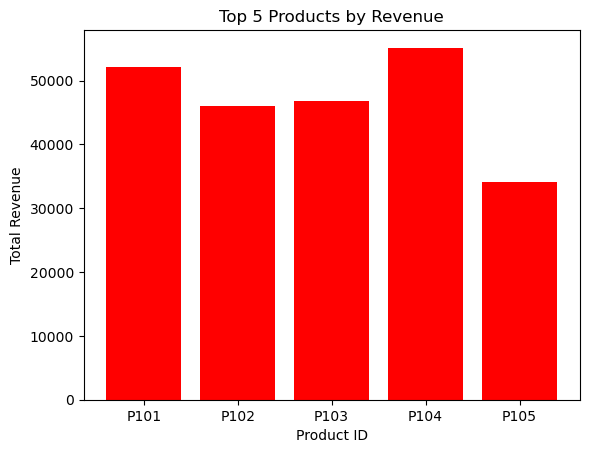

In [81]:
plt.bar(total['product_id'],total['total_revenue'],color='red')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.title('Top 5 Products by Revenue')

In [82]:
avg=df2.groupby('product_id')['sentiment_score'].mean().reset_index()
avg

,product_id,sentiment_score
0,P101,2.880612
1,P102,2.999000
2,P103,2.900000
3,P104,3.054867
4,P105,3.035294


Text(0.5, 1.0, 'Products Sentiment Analysis')

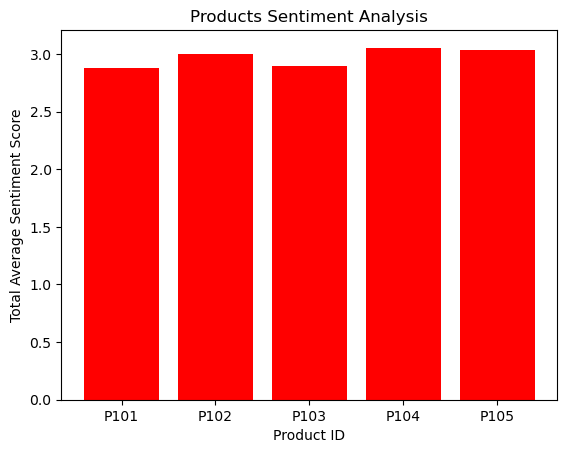

In [83]:
plt.bar(avg['product_id'],avg['sentiment_score'],color='red')
plt.xlabel('Product ID')
plt.ylabel('Total Average Sentiment Score')
plt.title('Products Sentiment Analysis')

In [85]:
x=df[['sale_price']]
x

,sale_price
0,150.0
1,75.0
2,250.5
3,150.0
4,30.0
...,...
995,250.5
996,30.0
997,75.0
998,250.5


In [96]:
x['sale_price']=x['sale_price'].fillna(0)
x

C:\Users\Dell\AppData\Local\Temp\ipykernel_26508\736170141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sale_price']=x['sale_price'].fillna(0)


,sale_price
0,150.0
1,75.0
2,250.5
3,150.0
4,30.0
...,...
995,250.5
996,30.0
997,75.0
998,250.5


In [98]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(x)

C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

In [102]:
cluster_map = {0:'General', 1:'Regular', 2:'VIP'}
df['category'] = df['cluster'].map(cluster_map)
df

,sale_id,product_id,customer_id,sale_price,quantity,sale_date,total_revenue,cluster,category
0,1001,P101,C_001,150.0,2.0,15-01-2023,300.0,0,General
1,1002,P102,C_002,75.0,3.0,20-01-2023,225.0,1,Regular
2,1003,P103,C_001,250.5,1.0,25-01-2023,250.5,2,VIP
3,1004,P101,C_003,150.0,4.0,01-02-2023,600.0,0,General
4,1005,P104,C_004,30.0,0.0,05-02-2023,0.0,1,Regular
...,...,...,...,...,...,...,...,...,...
995,1996,P104,C_042,250.5,4.0,29-03-2023,1002.0,2,VIP
996,1997,P105,C_014,30.0,1.0,03-02-2023,30.0,1,Regular
997,1998,P104,C_092,75.0,0.0,31-03-2023,0.0,1,Regular
998,1999,P103,C_063,250.5,5.0,10-03-2023,1252.5,2,VIP


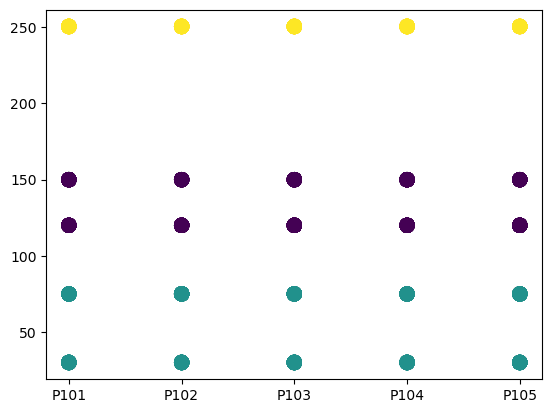

In [124]:
plt.scatter(df['product_id'],df['sale_price'],c=df['cluster'], cmap='viridis', s=100)